In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.integrate import ode
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
from mpl_toolkits import axes_grid1

In [2]:
a= 5
b= 500
xx = np.linspace(-a, a, b)
yy = np.linspace(-a, a, b)
mX, mY = np.meshgrid(xx,yy)

In [3]:
r1=np.array([0,0])   # f is direction of the force
f=np.array([0,1])    # r is position of the force red arrow - touchdown point     


e = np.array([0,1])
d = np.array([1,0])

def stokeslet(f, r0, mX, mY, e, d):
    
    r = np.array([mX-r0[0],mY-r0[1]])
    
    modr=(r[0]**2+r[1]**2)**.5 
    
    jeden = ((d[0]*r[0]+ d[1]*r[1])*e[:, np.newaxis, np.newaxis] - (e[0]*r[0]+e[1]*r[1])*d[:, np.newaxis, np.newaxis] )/modr**3
    dwa =  -((d[0]*e[0]+d[1]*e[1])*r)/modr**3
    trzy = 3*((e[0]*r[0]+e[1]*r[1])*(d[0]*r[0]+ d[1]*r[1])*r)/modr**5
    
    u,v = trzy+jeden+dwa
    ua, va = jeden
    us, vs = dwa+trzy 
    
    return np.array([[u,v], [ua,va], [us,vs]])


r1=np.array([0,0])


us, vs = stokeslet(f, r1,mX,mY,e,d)[0]
ua, va  = stokeslet(f, r1,mX,mY,e,d)[1]
u, v  = stokeslet(f, r1,mX,mY,e,d)[2]


def B_dir(t,p,fx,fz):
    ex = fx(p[0],p[1])
    ez = fz(p[0],p[1])
    n = (ex**2.0+ez**2.0) ** 0.5  
    return [ex/n, ez/n]

In [4]:

ystart = np.zeros(14)
xstart = np.zeros(14)

k=0
for i in range(0, 14):
        ystart[i]=k*(5/14)
        k=k+1

places=np.vstack([xstart,ystart]).T

# interpolate function of the Bx and Bz as functions of (x,z) position
fbx = interpolate.interp2d(xx,yy,ua)
fbz = interpolate.interp2d(xx,yy,va)

R=0.001
dt=0.8*R

# plot area
x0, x1= -0.99*a, 0.99*a
y0, y1= -0.99*a, 0.99*a 

#set the ode function
r=ode(B_dir)
r.set_integrator('vode')
r.set_f_params(fbx,fbz)



/var/folders/95/7_vspww56v5bfch3bd_lv06c0000gn/T/ipykernel_15364/3499595785.py:37: RuntimeWarning: invalid value encountered in divide
  return [ex/n, ez/n]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/integrate/_ode.py:1013: UserWarning: vode: Repeated convergence failures. (Perhaps bad Jacobian supplied or wrong choice of MF or tolerances.)
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


 DVODE--  At T (=R1) and step size H (=R2), the    
       corrector convergence failed repeatedly     
       or with abs(H) = HMIN   
      In above,  R1 =  0.0000000000000D+00   R2 =  0.1047442341578D-12
14
2
[2, 50001]
h 166 33200
l 50001


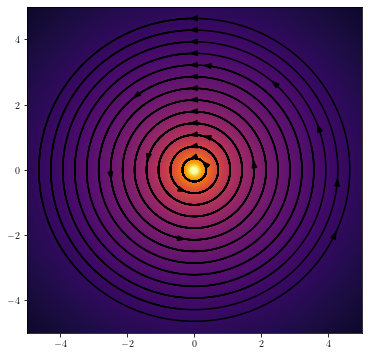

In [6]:
xs,ys = [],[]

fig=plt.figure(figsize=(6,6),facecolor =  "w")
ax = plt.axes()
plt.rcParams['text.usetex'] = True


Z = np.sqrt(va**2+ua**2)

plt.pcolormesh(mX, mY, Z,
                  norm=colors.LogNorm(vmin= 10**(-2), vmax=10**2),
               snap=True,
                   cmap=plt.cm.inferno, rasterized=True, 
              shading='gouraud')

for p in places:
    x=[p[0]] 
    y=[p[1]]
    r.set_initial_value([p[0], p[1]], 0)
    while r.successful():
        r.integrate(r.t+dt)
        x.append(r.y[0])
        y.append(r.y[1])
        hit_electrode=False
        if len(y) > 50000:
            break
        #check if field line left drwaing area
        if (not (x0<r.y[0] and r.y[0]<x1)) or (not (y0<r.y[1] and r.y[1]<y1)):
            break
    xs.append(x)
    ys.append(y)
    

p, result = [], []
for x in xs:
    p.append(len(x))

    
[result.append(x) for x in p if x not in result]

result.sort()

l = result[1]
h = int(l/300)

for x,y in zip(xs,ys):
    ax.plot(x,y, color="k" , zorder=10)
    if len(x) > 2:
        ax.arrow(x[h], y[h], (x[h-1]-x[h-2]), (y[h+5]-y[h+4]), 
            length_includes_head=True, head_width=.15, color="k", zorder=5)
        ax.arrow(x[150*h], y[150*h], x[150*h-1]-x[150*h-2], y[150*h+5]-y[150*h+4], 
             length_includes_head=True, head_width=.15, color="k", zorder=5)
  

plt.savefig('okrąg.pdf', bbox_inches='tight', pad_inches=0, dpi=400)

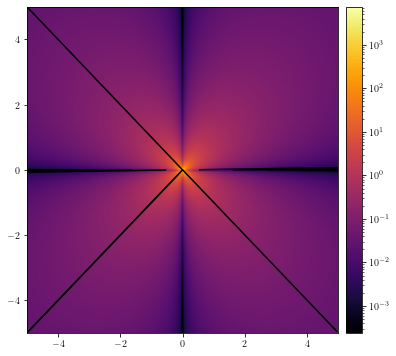

In [18]:
fig=plt.figure(figsize=(6,6),facecolor="w") 
ax = plt.axes()
plt.rcParams['text.usetex'] = True


Z = np.sqrt(v**2+u**2)
image = ax.pcolormesh(mX, mY, Z,
                #norm=colors.LogNorm(vmin= 10**(-4), vmax=10**2),    
                norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()), 
                      snap=True,
               cmap=plt.cm.inferno, rasterized=True, 
               shading='gouraud', zorder=0)


def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)


add_colorbar(image)

xstart = np.linspace(-0.99*a, 0.99*a, 10)
ystart =np.zeros(10)

for i in (0, 9):
    if i<5:
        ystart[i] =0.99*a
    else:
        ystart[i] = -0.99*a

    
places=np.vstack([xstart,ystart]).T


fbx = interpolate.interp2d(xx,yy,u)
fbz = interpolate.interp2d(xx,yy,v)

R=0.001
dt=0.8*R

# plot area
x0, x1= -0.99*a, 0.99*a
y0, y1= -0.99*a, 0.99*a

#set the ode function
r=ode(B_dir)
r.set_integrator('vode')
r.set_f_params(fbx,fbz)

xs,ys = [],[]
for p in places:
    x=[p[0]] 
    y=[p[1]]
    r.set_initial_value([p[0], p[1]], 0)
    while r.successful():
        r.integrate(r.t+dt)
        x.append(r.y[0])
        y.append(r.y[1])
        hit_electrode=False
        if (not (x0<r.y[0] and r.y[0]<x1)) or (not (y0<r.y[1] and r.y[1]<y1)):
            break
    xs.append(x)
    ys.append(y)
    
for x,y in zip(xs,ys):
    ax.plot(x,y, color="k" , zorder=10)

#plt.streamplot(xx, yy, u, v, broken_streamlines=False)
#plt.savefig('complex.pdf', bbox_inches='tight', pad_inches=0, dpi=400)


In [26]:
amx = np.zeros(20)
x = np.linspace(np.cos(np.arctan(2/np.sqrt(3))), np.sin(0), 10)

for i in range(0, 10):
    amx[i] = x[i]
    y = np.flip(x)
    amx[i+10] = y[i]

print(amx)
#amy = np.linspace(np.sin(np.arctan(2/np.sqrt(3))), np.sin(3*np.pi/4), 20)

[0.65465367 0.58191437 0.50917508 0.43643578 0.36369648 0.29095719
 0.21821789 0.14547859 0.0727393  0.         0.         0.0727393
 0.14547859 0.21821789 0.29095719 0.36369648 0.43643578 0.50917508
 0.58191437 0.65465367]
